# Maju Jaya Digital Technology

---

## Employee Income and Segmentation Analysis

## 1. Business Understanding
**MAJU JAYA DIGITAL TECHNOLOGY** aims to better understand the factors that influence employee income. Currently, salary structures are applied in a general way without fully considering key variables such as education level, years of experience, performance, or workload. This may lead to risks of unfair compensation, reduced employee motivation, and higher turnover.

By leveraging employee data, the company seeks to gain clearer insights into compensation patterns and establish an objective, data-driven foundation for HR decision-making.

---

### 1.1 Objective
The objective of this project is to build a regression model that can:
- Predict monthly income of both new and existing employees based on their profile and performance.
- Identify the most influential factors affecting income to support fair and competitive compensation strategies.
- Provide data-driven insights for HR management in recruitment, promotion, and employee retention.

---

### 1.2 Modeling Selection
Modeling Selection: **Regression**

Regression is chosen as the modeling approach because the target variable `monthly_income` is continuous numeric. This allows the company to:
- Estimate the exact salary value for an employee rather than only classifying them into income categories.
- Compare different regression algorithms such as **Linear Regression**, **Random Forest Regressor**, and **XGBoost Regressor** to determine the most accurate and robust model.
- Interpret the relationship between employee attributes (e.g., years of experience, education level, performance score, overtime hours) and monthly income.

# 2. Importing Libraries

In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 3. Dataset

## 3.1 Data Understanding

In [86]:
# Importing Data #
df =  pd.read_csv('employee_for_ML.csv')

# Check #
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3030 non-null   int64  
 1   employee_id        3030 non-null   int64  
 2   age                2843 non-null   float64
 3   gender             3030 non-null   object 
 4   marital_status     3030 non-null   object 
 5   city               3030 non-null   object 
 6   education_level    3030 non-null   object 
 7   years_experience   2894 non-null   float64
 8   weekly_hours       2872 non-null   float64
 9   department         2878 non-null   object 
 10  bonus_percentage   1819 non-null   float64
 11  performance_score  3030 non-null   float64
 12  overtime_hours     2789 non-null   float64
 13  monthly_income     3030 non-null   int64  
 14  income_class       3030 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 355.2+ KB


,Unnamed: 0,employee_id,age,years_experience,weekly_hours,bonus_percentage,performance_score,overtime_hours,monthly_income
count,3030.000000,3030.000000,2843.000000,2894.000000,2872.000000,1819.000000,3030.000000,2789.000000,3030.000000
mean,1514.500000,1499.963366,35.645445,10.096752,40.202542,9.911765,75.098086,10.000574,9404.676568
std,874.829983,866.474895,11.301053,4.845805,6.430485,3.002598,10.524693,4.967633,6006.600245
min,0.000000,1.000000,-10.000000,0.000000,23.100000,-1.600000,39.700000,0.000000,878.000000
25%,757.250000,750.250000,30.000000,7.000000,36.700000,7.900000,68.300000,6.300000,7237.750000
50%,1514.500000,1498.500000,35.000000,10.000000,40.000000,9.900000,74.900000,9.800000,9094.000000
75%,2271.750000,2250.750000,41.000000,13.000000,43.300000,12.100000,82.000000,13.400000,10949.500000
max,3029.000000,3000.000000,118.000000,27.000000,128.900000,19.000000,150.000000,28.600000,148880.000000


In [87]:
df = df.drop(columns = ['Unnamed: 0', 'employee_id'])

In [88]:
df['monthly_income'].mean()

9404.676567656767

In [89]:
# Check Missing Value #
df.isnull().sum()

age                   187
gender                  0
marital_status          0
city                    0
education_level         0
years_experience      136
weekly_hours          158
department            152
bonus_percentage     1211
performance_score       0
overtime_hours        241
monthly_income          0
income_class            0
dtype: int64

**Column Definitions**
- `age`: Employee age
- `gender`: Gender
- `marital_status`: Marital status
- `city` : City of workplace
- `education_level` : Highest education level
- `years_experience`: Years of work experience
- `weekly_hours`: Weekly working hours
- `department`: Department of employment
- `bonus_percentage` : Annual bonus percentage
- `performance_score`: Performance score
- `overtime_hours`: Monthly overtime hours
- `monthly_income`: Monthly income

## 3.2 Exploratory Data Analysis

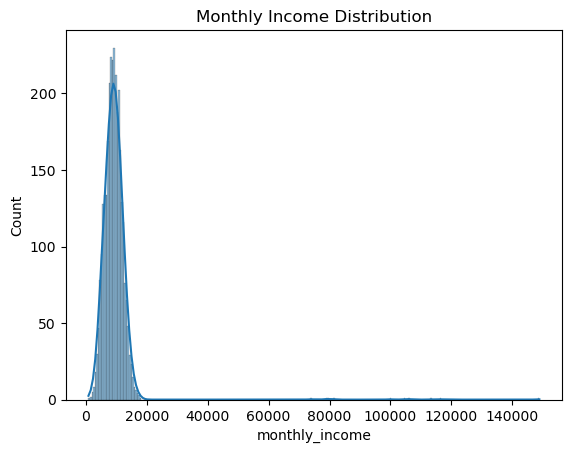

In [90]:
# Distribution of target #
sns.histplot(df['monthly_income'], kde = True)
plt.title('Monthly Income Distribution')
#plt.savefig('Monthly Income Distribution')
plt.show()

In [91]:
df.head()

,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
0,39.0,Other,Single,Surabaya,S1,10.0,42.3,Marketing,6.5,64.3,5.8,7887,Low
1,34.0,Female,Single,Surabaya,S1,10.0,41.0,IT,9.7,87.6,NaN,10870,High
2,40.0,Male,Married,Surabaya,SMA,4.0,42.3,HR,12.7,61.5,12.3,6228,Low
3,47.0,Female,Single,Jakarta,S1,4.0,42.2,Marketing,NaN,81.6,13.3,7041,Low
4,33.0,Male,Married,Surabaya,D3,15.0,31.1,IT,11.5,71.9,13.7,9657,High


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2843 non-null   float64
 1   gender             3030 non-null   object 
 2   marital_status     3030 non-null   object 
 3   city               3030 non-null   object 
 4   education_level    3030 non-null   object 
 5   years_experience   2894 non-null   float64
 6   weekly_hours       2872 non-null   float64
 7   department         2878 non-null   object 
 8   bonus_percentage   1819 non-null   float64
 9   performance_score  3030 non-null   float64
 10  overtime_hours     2789 non-null   float64
 11  monthly_income     3030 non-null   int64  
 12  income_class       3030 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 307.9+ KB


**Insight**
- Most data clustered in low-income brackets ($0$ to $20000$)
- Significant right-skew

In [93]:
# Numerical and Categorical Columns #
num_cols = df[['age', 'years_experience', 'weekly_hours', 'bonus_percentage', 'performance_score', 'overtime_hours']]
cat_cols = df[['gender', 'marital_status', 'city', 'education_level', 'department', 'income_class']]

### 3.2.1 Univariate 

#### Univariate of Numerical Columns

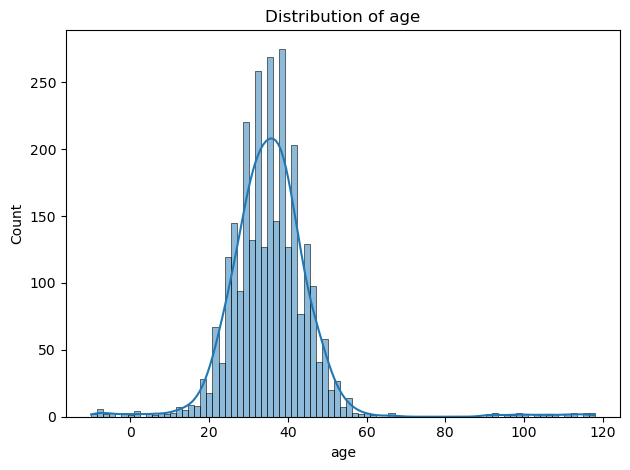

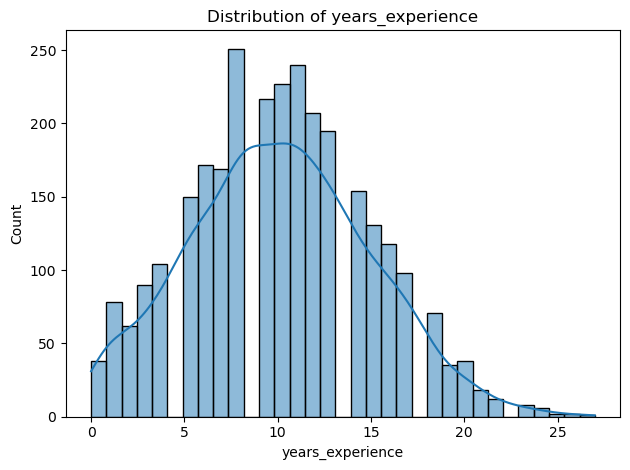

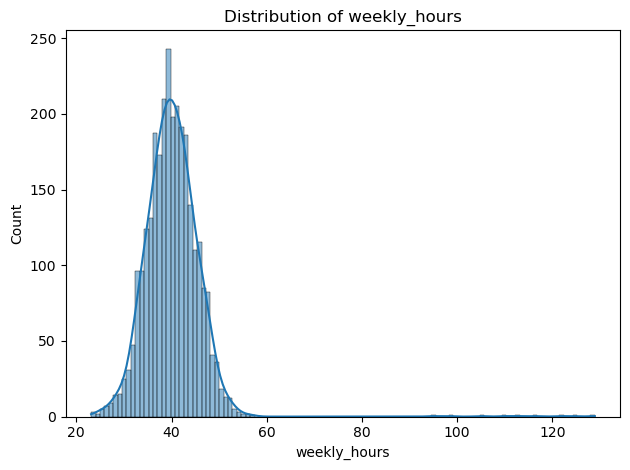

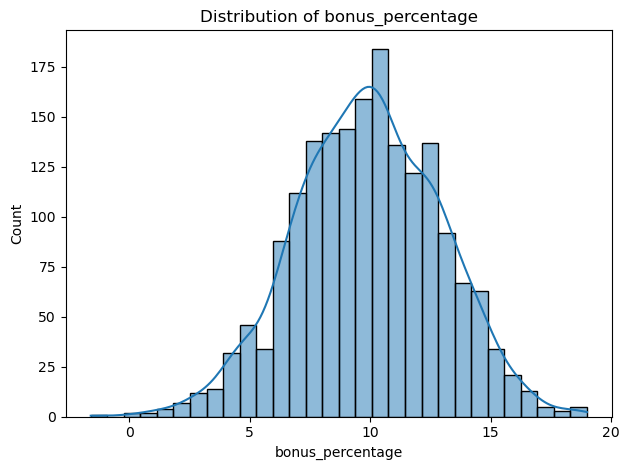

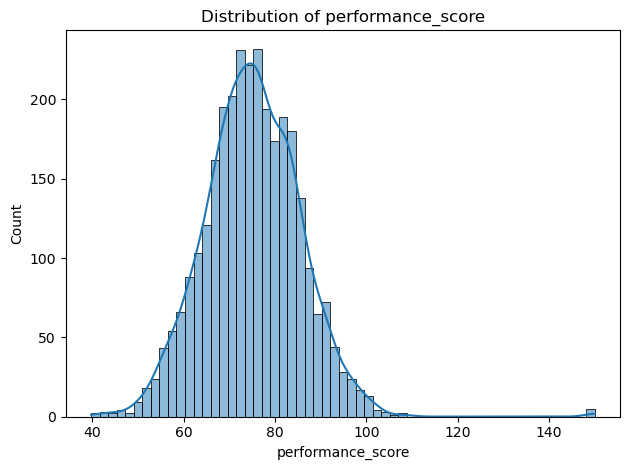

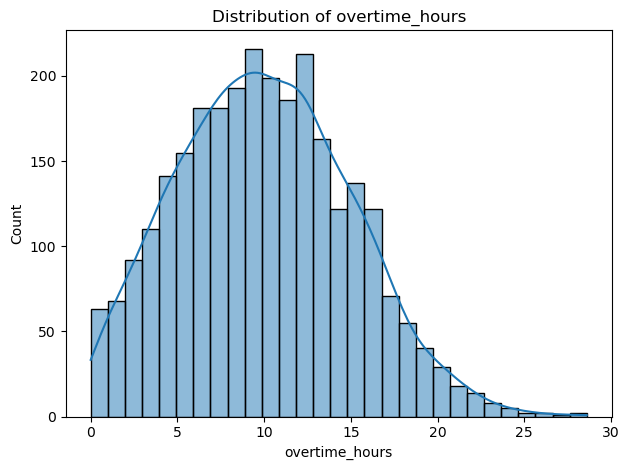

In [94]:
# Plot Distribution of Numerical Variables #
for i in num_cols:
    sns.histplot(df[i], kde = True)
    plt.title(f'Distribution of {i}')
    plt.tight_layout()
    #plt.savefig(f'Distribution of {i}')
    plt.show()

In [95]:
# Skewness Check #
for i in num_cols.columns:
    skew_val = df[i].skew()
    print(f'{i}: Skewness = {skew_val:.3f}')

age: Skewness = 2.118
years_experience: Skewness = 0.166
weekly_hours: Skewness = 4.691
bonus_percentage: Skewness = -0.079
performance_score: Skewness = 0.553
overtime_hours: Skewness = 0.242


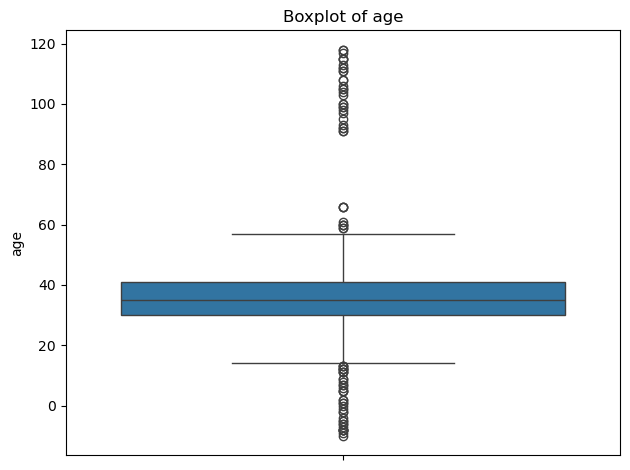

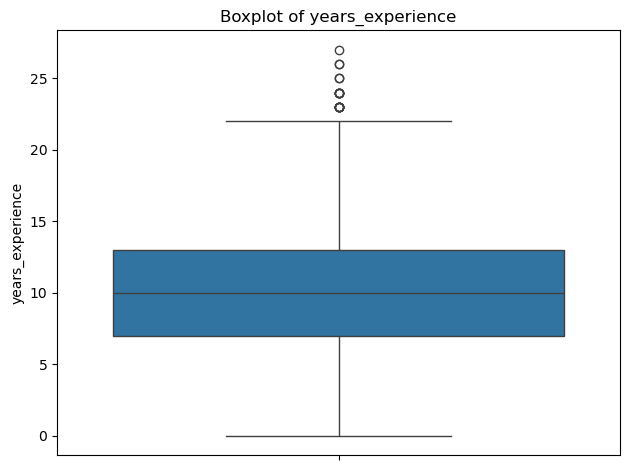

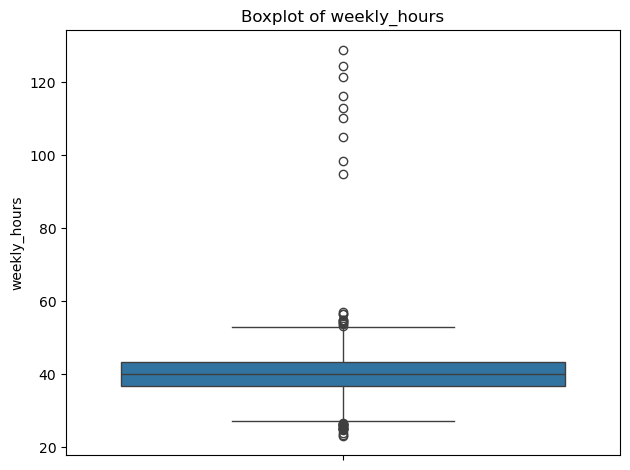

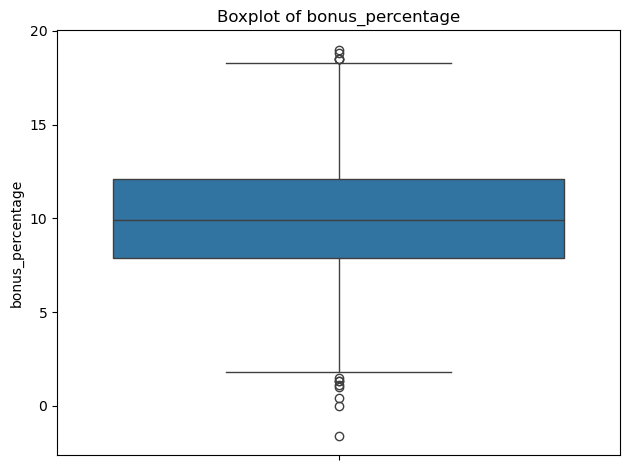

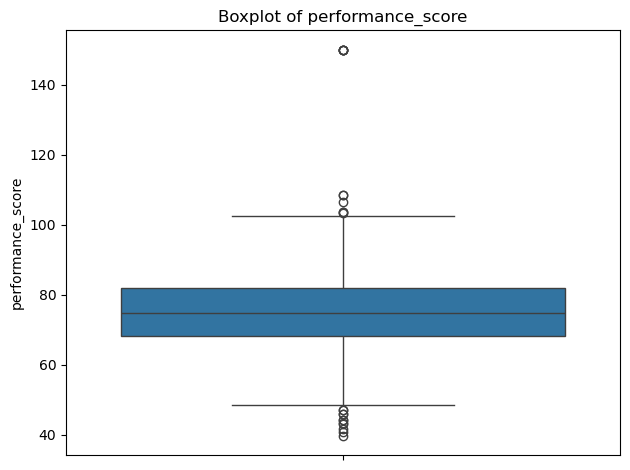

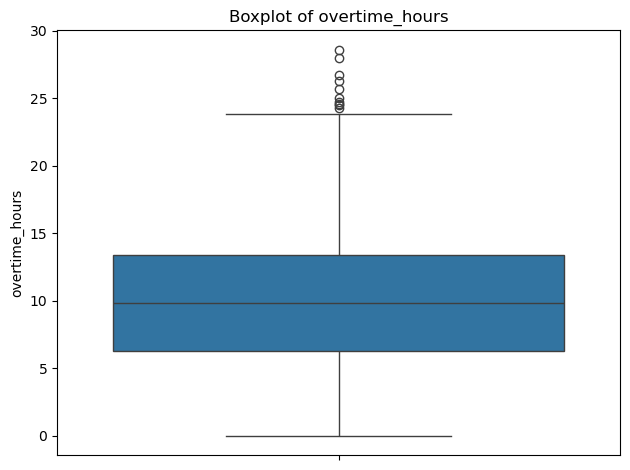

In [96]:
# Plot Distribution of Numerical Variables #
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.tight_layout()
    #plt.savefig(f'Boxplot of {i}')
    plt.show()

In [97]:
df[df['age'] < 0]

,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
47,-5.0,Male,Divorced,Bandung,SMA,16.0,35.1,Sales,NaN,78.7,13.1,11895,High
346,-2.0,Female,Single,Surabaya,S1,3.0,45.4,Finance,NaN,72.9,13.5,5368,Low
735,-10.0,Female,Single,Jakarta,D3,15.0,31.8,Sales,4.8,70.3,15.6,12236,High
1236,-8.0,Female,Married,Bandung,S1,14.0,38.5,HR,NaN,75.4,19.6,9157,High
1249,-4.0,Male,Single,Jakarta,SMA,15.0,33.9,Finance,13.2,73.6,14.8,9519,High
1308,-1.0,Female,Single,Surabaya,SMA,NaN,43.7,Finance,18.5,73.9,1.0,15116,High
1338,-9.0,Female,Married,Jakarta,S1,11.0,39.0,Finance,NaN,55.1,3.8,9212,High
1533,-6.0,Male,Divorced,Jakarta,S1,12.0,36.4,Finance,11.9,53.9,0.2,9272,High
1661,-7.0,Female,Divorced,Jakarta,D3,12.0,43.1,Marketing,NaN,54.4,22.1,10183,High
1870,-8.0,Male,Married,Surabaya,D3,19.0,43.9,Marketing,NaN,56.6,12.4,12537,High


#### Univariate of Categorical Columns

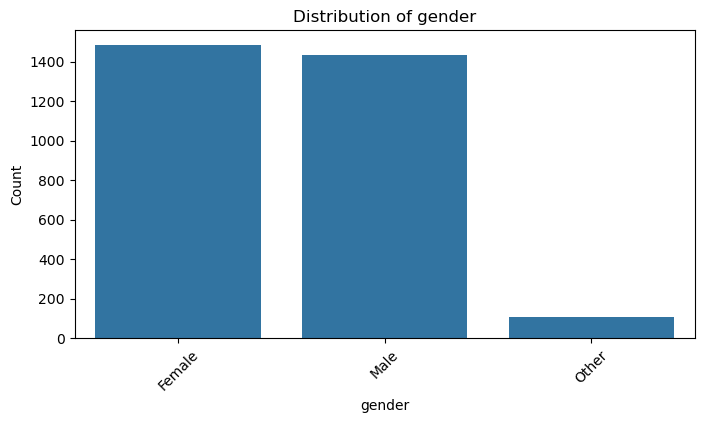

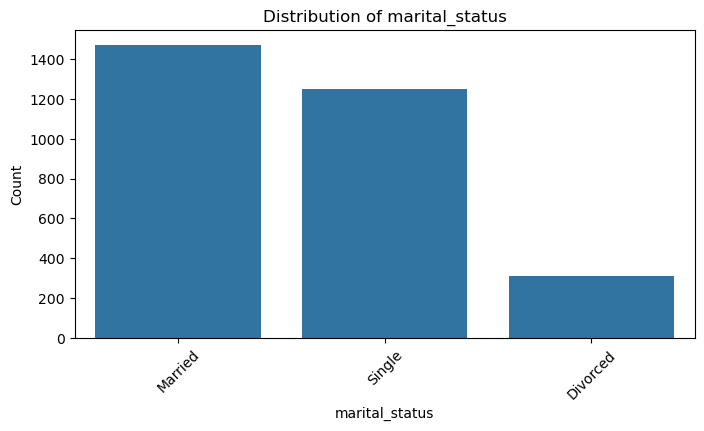

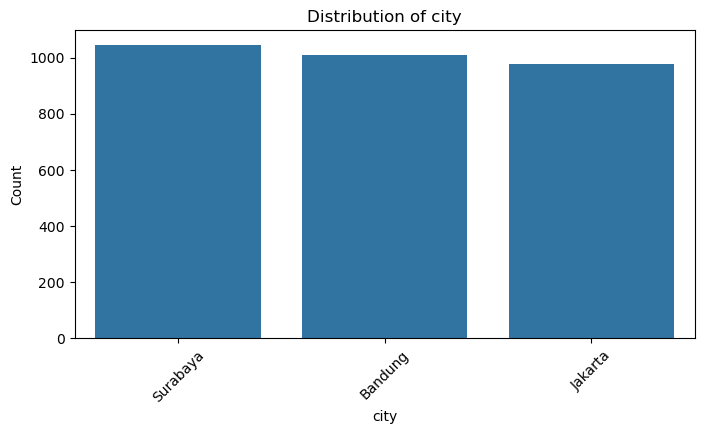

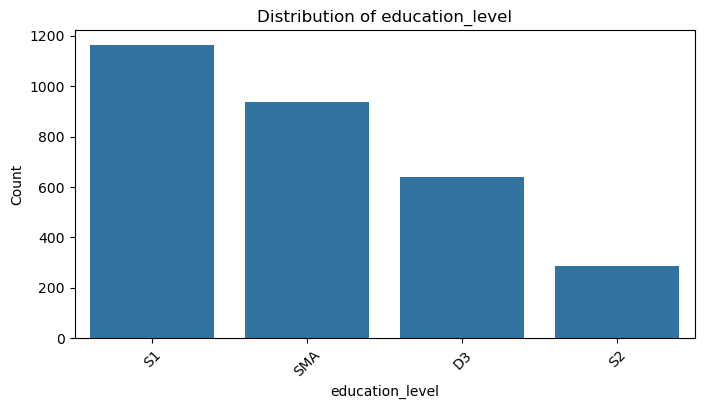

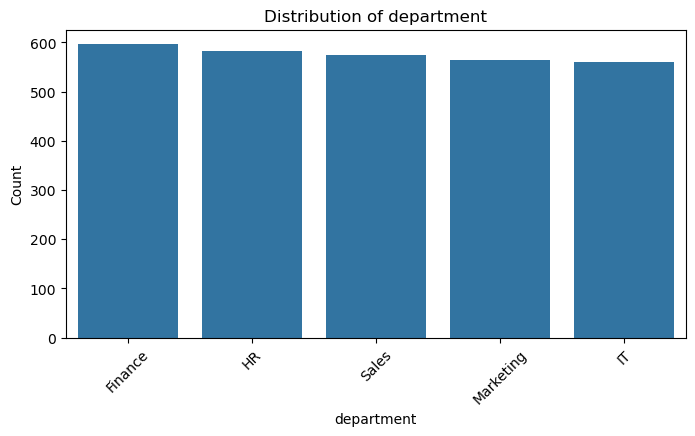

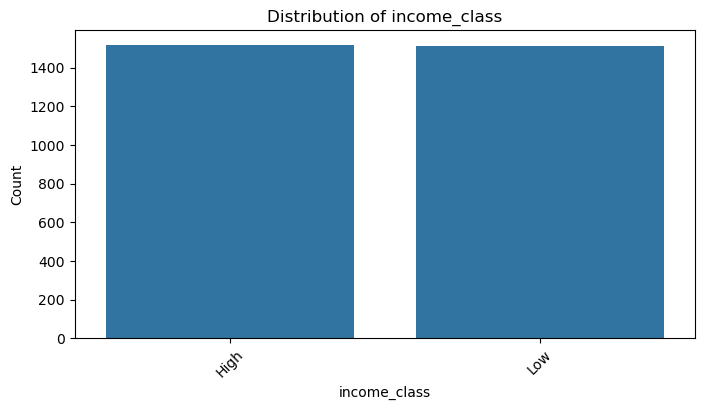

In [98]:
# Plot Distribution of Categorical Variables #
for i in cat_cols:
    plt.figure(figsize=(8,4))
    value_counts = df[i].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    #plt.savefig(f'Distribution of {i}')
    plt.show()

### 3.2.2 Bivariate

#### Bivariate of Numerical Columns

##### Heatmap

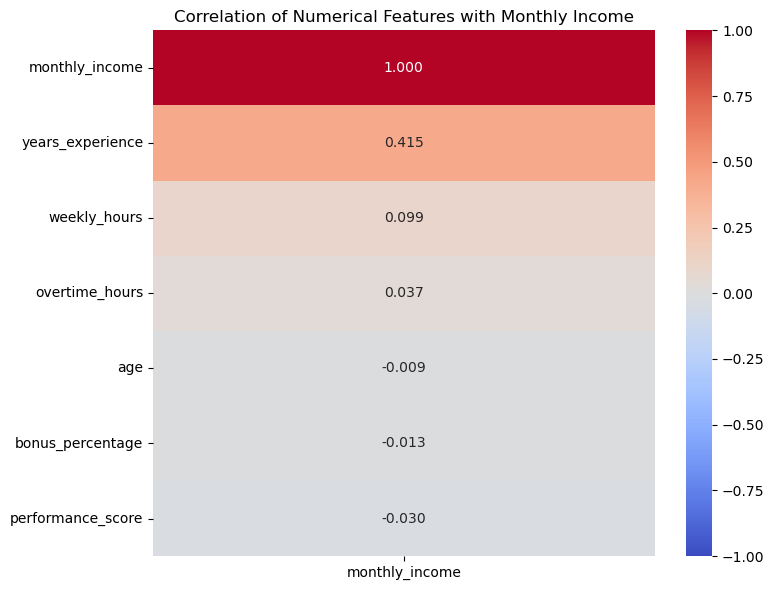

In [99]:
heatmap = df[['age', 'years_experience', 'weekly_hours',
              'bonus_percentage', 'performance_score',
              'overtime_hours', 'monthly_income']]

# Correlation with target #
heatmap = heatmap.corr()

# Plot heatmap #
plt.figure(figsize = (8,6))
sns.heatmap(heatmap[['monthly_income']].sort_values(by = 'monthly_income', ascending = False),
            cmap = 'coolwarm', 
            annot = True,
            fmt = '.3f',
            vmin = -1,
            vmax = 1)
plt.title('Correlation of Numerical Features with Monthly Income')
plt.tight_layout()
#plt.savefig('Correlation of Numerical Features with Monthly Income')
plt.show()

##### Scatter Plot

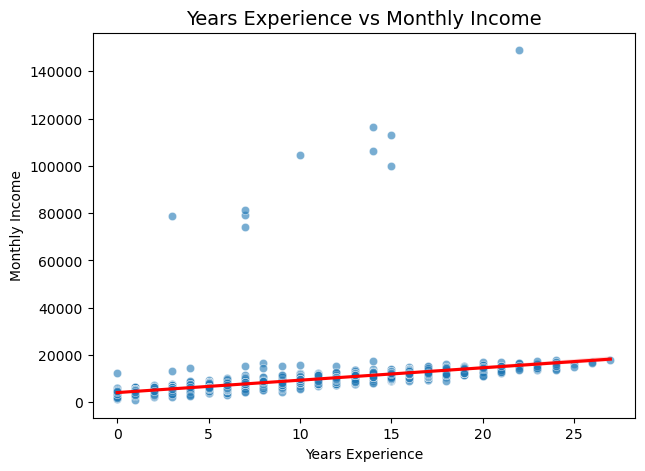

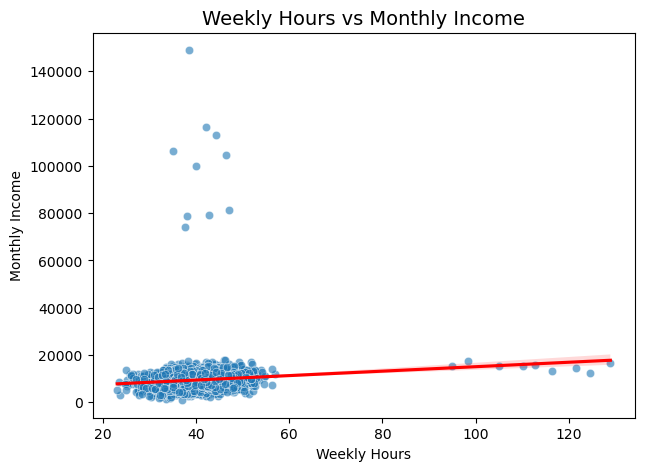

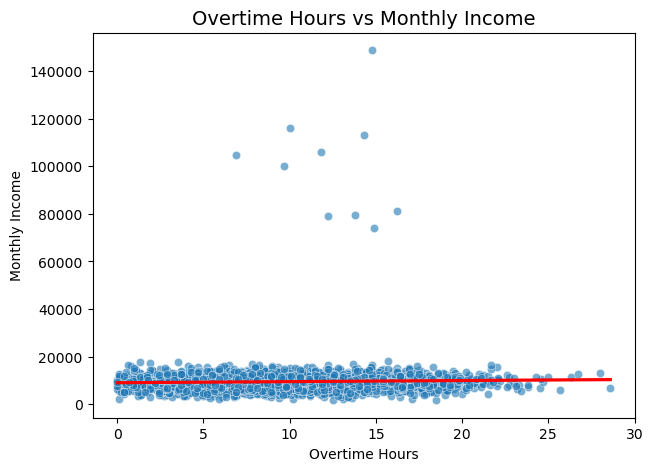

In [100]:
num_scat = df[['years_experience', 'weekly_hours', 'overtime_hours']]

num_scat = ['years_experience', 'weekly_hours', 'overtime_hours']

for col in num_scat:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=col, y='monthly_income', alpha=0.6)
    sns.regplot(data=df, x=col, y='monthly_income', scatter=False, color='red')
    plt.title(f"{col.replace('_',' ').title()} vs Monthly Income", fontsize=14)
    plt.xlabel(col.replace('_',' ').title())
    plt.ylabel("Monthly Income")
    plt.savefig(f"{col.replace('_',' ').title()} vs Monthly Income")
    plt.show()    

**INSIGHT**
- `years_experience` has the strongest positive correlation ($0.415$).
  - Employee with higher work experience tend to earn more.
- `weekly_hours` have weak positive correlation ($0.099$).
  - Slight tendency that working longer standard hours may earn more.
- `overtime_hours` have very weak positive correlation ($0.037$).
  - Overtime hours have slight effect on monthly income albeit can be considered negligible

#### Bivariate of Categorical Columns 

#### Boxplot

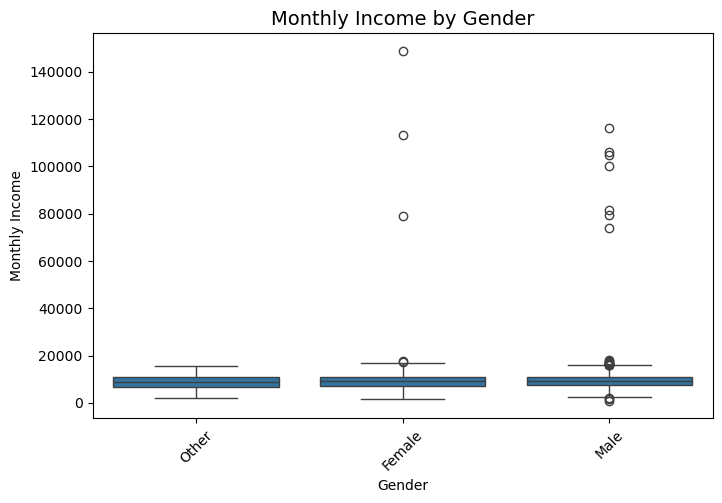

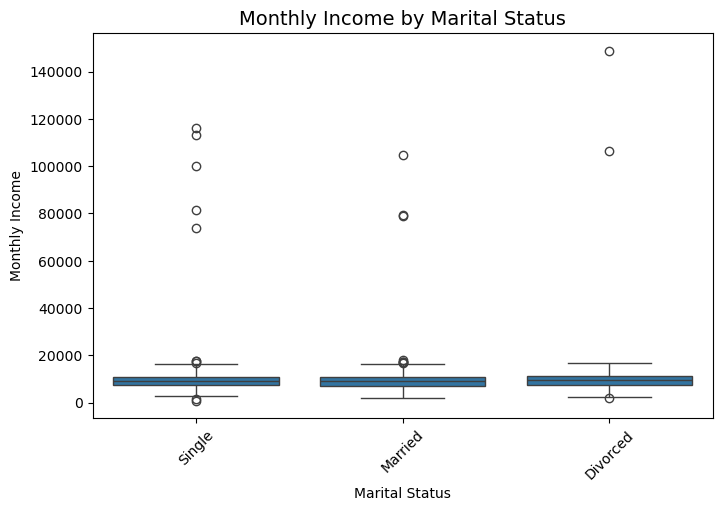

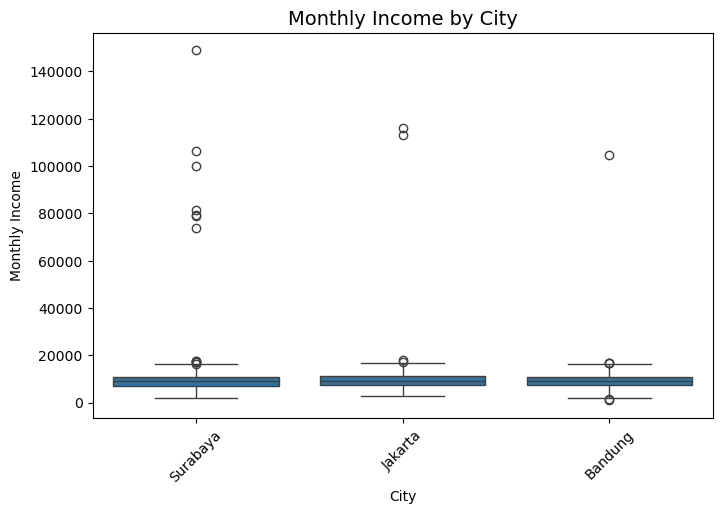

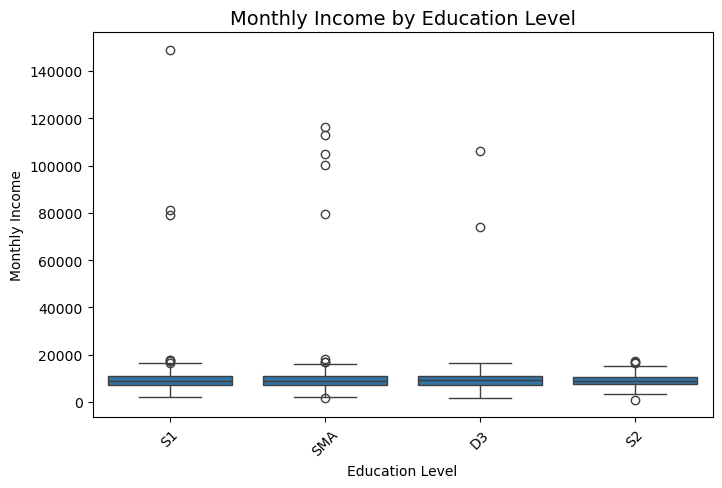

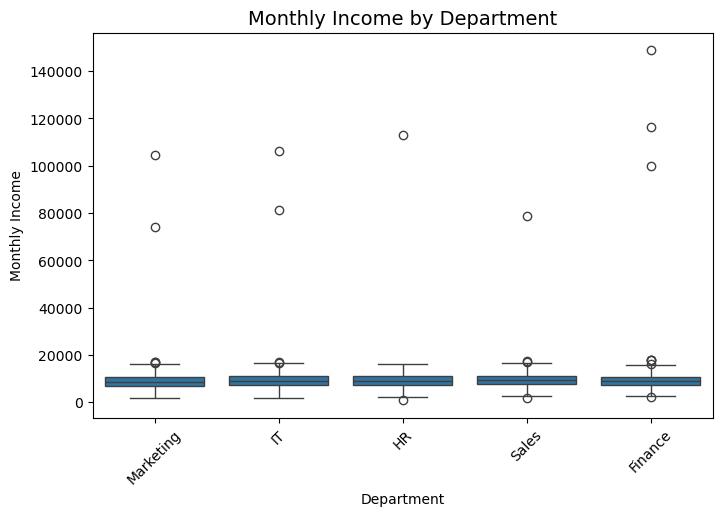

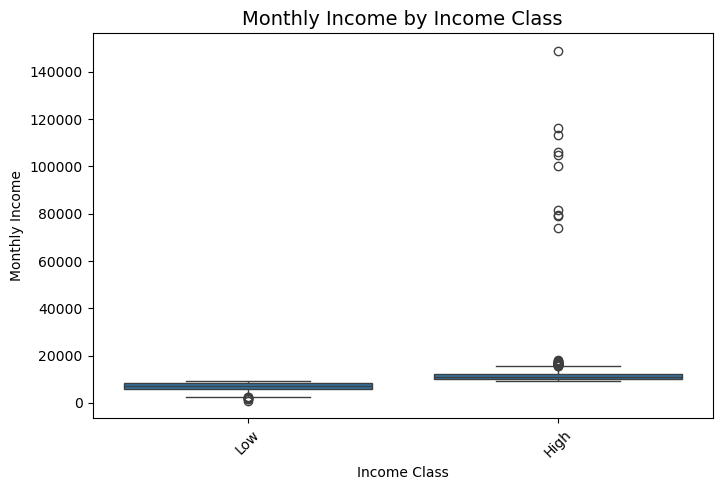

In [101]:
for i in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=i, y='monthly_income')
    plt.title(f"Monthly Income by {i.replace('_',' ').title()}", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Monthly Income")
    plt.xlabel(i.replace('_',' ').title())
    #plt.savefig(f"Monthly Income by {i.replace('_',' ').title()}")
    plt.show()

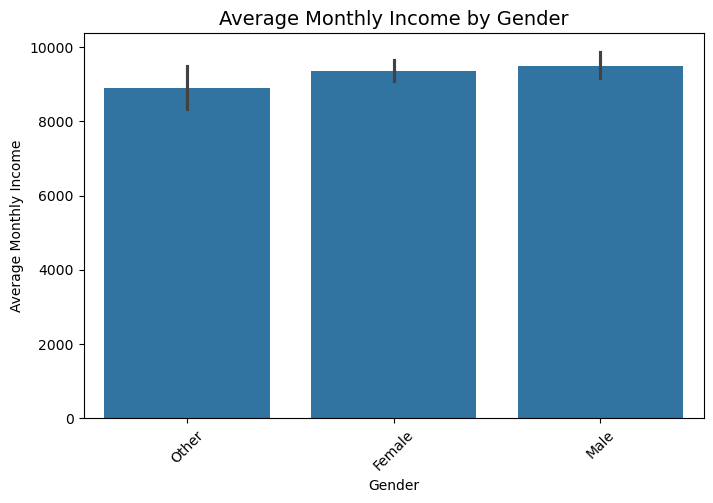

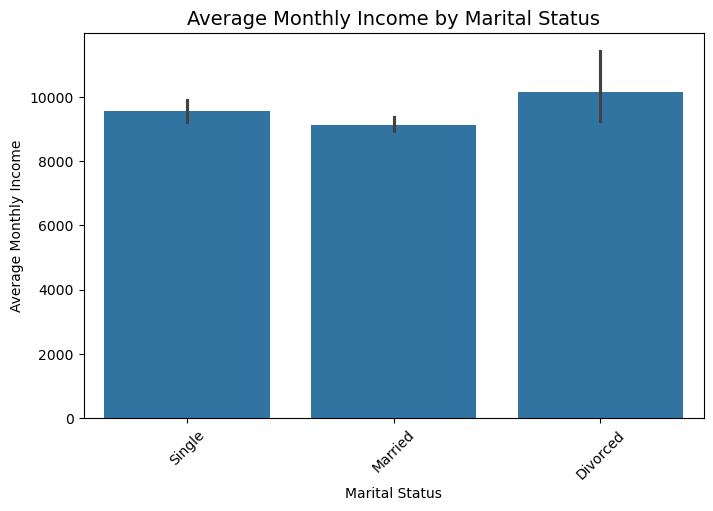

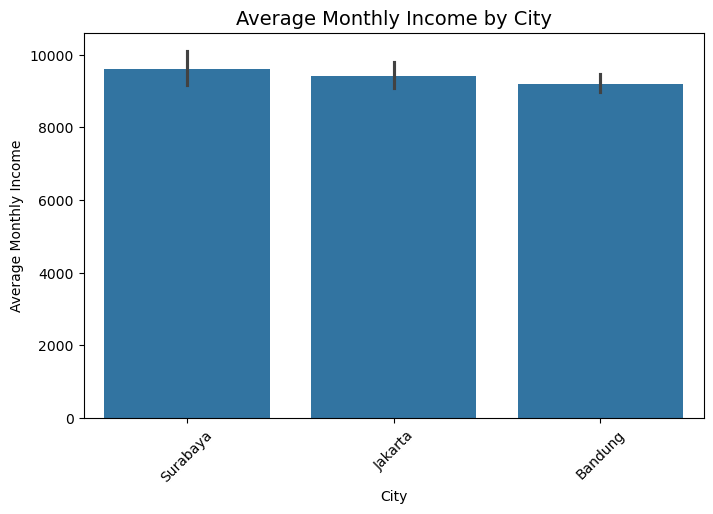

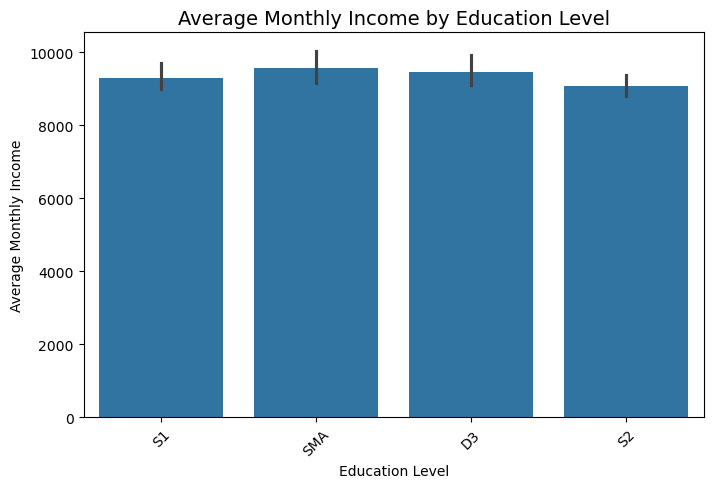

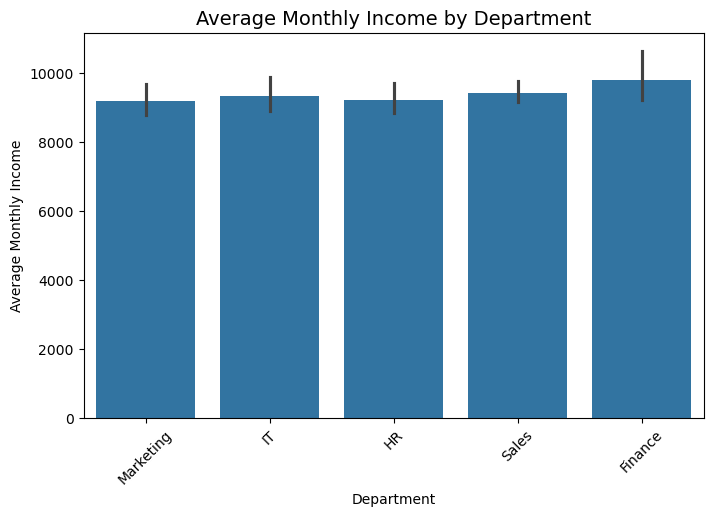

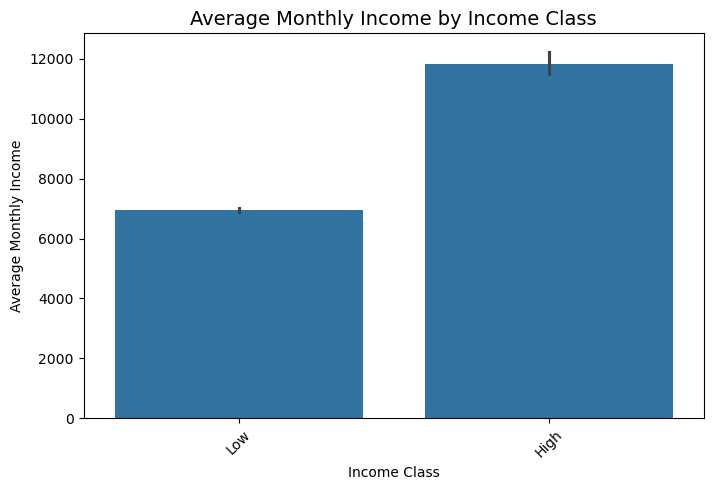

In [102]:
for i in cat_cols:
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x=i, y='monthly_income', estimator=np.mean)
    plt.title(f"Average Monthly Income by {i.replace('_',' ').title()}", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Average Monthly Income")
    plt.xlabel(i.replace('_',' ').title())
    #plt.savefig(f'Average Monthly Income by {i.replace('_',' ').title()}')
    plt.show()

**INSIGHT**

#### Summary Table: Combined View of Factors Affecting Monthly Income

| Column | Barplot Observation | Boxplot Observation |
| :--- | :--- | :--- |
| **Department** | **Large disparity** in mean income. | Shows the **range of opportunity**. High-paying depts have high variability and outliers. |
| **Education** | **Positive relationship** between education and mean income. | Shows education raises the **floor, median, and ceiling** of potential income. |
| **Gender** | **Concerning gap** in mean income. | **Diagnoses the cause:** is it systemic (shifted box) or a representation issue (outliers)? |
| **City** | **Difference** in mean income between locations. | Distinguishes between **cost-of-living adjustment** (shifted box) and **role concentration** (outliers). |
| **Marital Status** | **Married > Single** mean income. | Reveals this is a **proxy for age/experience** (similar medians, longer upper whisker for married). |

#### Outlier Handling

---
##### Outlier Handling Strategy
- `age` : Cap realistic age ($22$ $\leq$ age $\leq$ $65$)
- `weekly_hours`: Cap at max $80$ hours/week
- `bonus_percentage`: Leave as is due to being bonus, human biased might be a factor
- `overtime_hours`: Cap at $100$ hours/month

## 4. Train Test Split

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2843 non-null   float64
 1   gender             3030 non-null   object 
 2   marital_status     3030 non-null   object 
 3   city               3030 non-null   object 
 4   education_level    3030 non-null   object 
 5   years_experience   2894 non-null   float64
 6   weekly_hours       2872 non-null   float64
 7   department         2878 non-null   object 
 8   bonus_percentage   1819 non-null   float64
 9   performance_score  3030 non-null   float64
 10  overtime_hours     2789 non-null   float64
 11  monthly_income     3030 non-null   int64  
 12  income_class       3030 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 307.9+ KB


In [105]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop(columns = ['monthly_income', 'income_class'])
y = df['monthly_income']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [107]:
def clip_outliers(df):
    df = df.copy()
    df['weekly_hours'] = df['weekly_hours'].clip(upper=80)
    df['overtime_hours'] = df['overtime_hours'].clip(upper=100)
    df['bonus_percentage'] = df['bonus_percentage'].clip(0, 100)
    return df

X_train = clip_outliers(X_train)
X_test = clip_outliers(X_test)

## 5. Preprocessing

### Imputation Strategy
---

#### Numerical Columns
**Skewness Result**
- `age`: Skewness = $2.1184$ (Strong right skew &rarr; use median)
- `years_experience`: Skewness = $0.166$ (Slight right dkew &rarr; use mean)
- `weekly_hours`: Skewness = $4.691$ (Strong right skew &rarr; use median)
- `bonus_percentage`: Skewness = $-0.079$ (Close to $0$ &rarr; use mean)
- `performance_score`: Skewness = $0.553$ (Moderately right skewed &rarr; use median)
- `overtime_hours`: Skewness = $0.242$ (Slight right dkew &rarr; use mean)

- Numerical Columns
  - Imputation using *mean* : `years_experience`, `bonus_percentage`, `overtime_hours`
  - Imputation using *median*: `age`, `weekly_hours`, `performance_score`

#### Categorical Columns
Categorical Columns:
- `gender` : no missing values &rarr; no imputation needed
- `marital_status`: no missing values &rarr; no imputation needed
- `city` : no missing values &rarr; no imputation needed
- `education_level` : no missing values &rarr; no imputation needed
- `department` : has missing value &rarr; use 'Unknown'

---

### Encoding Strategy
- Ordinal Encoding : `education_level`
- One-Hot Encoding : `gender`, `city`, `department`, `marital_status`

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler

In [109]:
num_mean = ['years_experience', 'bonus_percentage', 'overtime_hours']
num_median = ['age', 'weekly_hours', 'performance_score']

cat_ord = ['education_level']
cat_ohe = ['gender', 'city', 'department', 'marital_status']

# Education map #
edu_map = [['SMA', 'D3', 'S1', 'S2']]

### 5.1 Preprocessing Pipeline

In [110]:
num_mean_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

num_median_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('ordinal', OrdinalEncoder(categories = edu_map))
])

cat_ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# Combine by ColumnTransformer #
preprocessor = ColumnTransformer(transformers=[
    ('num_mean', num_mean_pipe, num_mean),
    ('num_median', num_median_pipe, num_median),
    ('cat_ord', cat_ord_pipe, cat_ord),
    ('cat_onehot', cat_ohe_pipe, cat_ohe)
])

In [111]:
# Fit transform train, transform test #
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

## 6. Modeling 

---

### Evaluation Metric
- **Mean Absolute Error (MAE):**
  - Average of the absolute differences between predicted and actual values.
  - Lower is better. Easy to interpret (same units as target).

- **Mean Squared Error (MSE):**
  - Average of the squared differences between predicted and actual values.
  - Lower is better. Penalizes larger errors more than MAE.

- **Root Mean Squared Error (RMSE):**
  - Square root of MSE. Same unit as target.
  - Lower is better. More sensitive to outliers.

- **R-squared (R²):**
  - Proportion of variance in the target explained by the model (0 to 1, higher is better).
  - Can be negative for very poor models.

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import max_error

In [113]:
# Models #
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [114]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [115]:
# Results #
results = []

for name, model in models.items():
    # Pipeline: Preprocessing + Model
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # Scoring Methods #
    rmse = -cross_val_score(pipe, X_train, y_train, cv=cv,
                            scoring='neg_root_mean_squared_error').mean()
    mae = -cross_val_score(pipe, X_train, y_train, cv=cv,
                           scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(pipe, X_train, y_train, cv=cv,
                           scoring='neg_mean_squared_error').mean()
    r2 = cross_val_score(pipe, X_train, y_train, cv=cv,
                         scoring='r2').mean()

    # Save Result #
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
    })

In [116]:
# Display Result #
df_result = pd.DataFrame(results).sort_values('MAE').reset_index(drop=True)
df_result

,Model,RMSE,MAE,MSE,R2
0,Linear Regression,5238.426788,1352.716902,3.364951e+07,0.278138
1,Gradient Boosting,6225.162267,1646.682304,4.311881e+07,-0.171520
2,Random Forest,6324.656606,1716.067715,4.294115e+07,-0.345216
3,Decision Tree,9239.872668,2155.956687,8.704664e+07,-4.088382


**INSIGHT**
- Linear Regression outperforms other models
  - Smallest RMSE ($4038.828276$), MAE($1120.617829$), and MSE($1.943721e+07$)
  - Highest $R^{2}$ ($0.333043$)

# 7. Modeling With Best Model

In [117]:
best_model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

best_model.fit(X_train,y_train)

# Evaluate on test set #
y_pred = best_model.predict(X_test)

# Result #
results_new = []

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_new.append({
        "Model": "Linear Regression",
        "RMSE": rmse,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
})

In [118]:
# Display Result #
df_result1 = pd.DataFrame(results_new).sort_values('MAE').reset_index(drop=True)
df_result1

,Model,RMSE,MAE,MSE,R2
0,Linear Regression,3779.08207,1143.608102,1.428146e+07,0.31959


## 8. Colinearity Check

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Helper: get feature names from your preprocessor
def get_feature_names(preprocessor):
    output_features = []
    for name, transformer, features in preprocessor.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                output_features.extend(transformer.get_feature_names_out(features))
            else:
                output_features.extend(features)
        else:
            output_features.extend(features)
    return output_features

In [121]:
# 1. Transform X_train using your preprocessor (exclude target column)
X_processed = preprocessor.transform(X_train)
feature_names = get_feature_names(preprocessor)

# 2. Put into a DataFrame
X_df = pd.DataFrame(X_processed, columns=feature_names)

# 3. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# 4. Display VIFs (sorted, optional)
print(vif_data.sort_values("VIF", ascending=False).reset_index(drop=True))

                   Feature       VIF
0   marital_status_Married  3.263038
1    marital_status_Single  2.843095
2          education_level  2.442327
3              gender_Male  1.866258
4            city_Surabaya  1.820812
5             city_Jakarta  1.779597
6         department_Sales  1.727570
7     department_Marketing  1.700503
8            department_HR  1.697630
9            department_IT  1.695059
10      department_Unknown  1.190604
11            gender_Other  1.071153
12        years_experience  1.007659
13       performance_score  1.007401
14        bonus_percentage  1.006457
15            weekly_hours  1.005121
16          overtime_hours  1.004711
17                     age  1.003066


**INSIGHT**

- All VIF values are well below the common threshold of 5 (or even the stricter threshold of 2.5–3.0).
- No sign of problematic multicollinearity in the dataset.
- The highest VIF (~3.26) is still considered low and not a concern.

## 9. Hyperparameter Tuning For Model With Parameter

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [123]:
# Define models with parameter grids
param_grids = {
    "Decision Tree": {
        "model__max_depth": [None, 5, 10, 20, 30],
        "model__min_samples_split": randint(2, 20),
        "model__min_samples_leaf": randint(1, 20)
    },
    "Random Forest": {
        "model__n_estimators": randint(50, 300),
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": randint(2, 20),
        "model__min_samples_leaf": randint(1, 20)
    },
    "Gradient Boosting": {
        "model__n_estimators": randint(50, 300),
        "model__learning_rate": uniform(0.01, 0.3),
        "model__max_depth": randint(2, 10),
        "model__min_samples_split": randint(2, 20),
        "model__min_samples_leaf": randint(1, 20)
    }
}

In [124]:
# Store results #
tuned_results = []

for name, params in param_grids.items():
    if name == "Decision Tree":
        model = DecisionTreeRegressor(random_state=42)
    elif name == "Random Forest":
        model = RandomForestRegressor(random_state=42)
    elif name == "Gradient Boosting":
        model = GradientBoostingRegressor(random_state=42)

    # Build pipeline #
    pipe = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    # Randomized Search
    search = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=20,  # number of random combos
        scoring="neg_root_mean_squared_error",
        cv=5,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)

    # Save best result
    tuned_results.append({
        "Model": name,
        "Best Params": search.best_params_,
        "Best RMSE": -search.best_score_
    })

In [125]:
# Display results
# Convert tuned results into DataFrame# 
df_tuned = pd.DataFrame(tuned_results)

# Sort by RMSE (lower = better) #
df_tuned = df_tuned.sort_values("Best RMSE").reset_index(drop=True)

# Display nicely #
df_tuned

,Model,Best Params,Best RMSE
0,Random Forest,"{'model__max_depth': 5, 'model__min_samples_le...",5317.387059
1,Gradient Boosting,"{'model__learning_rate': 0.02692347370813008, ...",5527.898374
2,Decision Tree,"{'model__max_depth': 10, 'model__min_samples_l...",5560.262969


## 10. Retrain With Tuned Model

In [126]:
best_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        max_depth=5,
        min_samples_leaf=2,
        n_estimators=200,
        random_state=42
    ))
])

best_rf.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_mean', ...), ('num_median', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [127]:
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Put results into a DataFrame
df_eval = pd.DataFrame([{
    "Model": "Random Forest (Tuned)",
    "RMSE": rmse,
    "MAE": mae,
    "MSE": mse,
    "R2": r2
}])

In [128]:
df_eval

,Model,RMSE,MAE,MSE,R2
0,Random Forest (Tuned),4078.490346,1383.647432,1.663408e+07,0.207504


In [133]:
# Combine Linear Regression and Random Forest results
df_comparison = pd.concat([df_result1, df_eval], ignore_index=True)

# Optional: sort by R2 descending
df_comparison = df_comparison.sort_values('R2', ascending=False).reset_index(drop=True)

df_comparison


,Model,RMSE,MAE,MSE,R2
0,Linear Regression,3779.082070,1143.608102,1.428146e+07,0.319590
1,Random Forest (Tuned),4078.490346,1383.647432,1.663408e+07,0.207504


**INSIGHT**
- Linear Regression has lower RMSE and MAE than the tuned Random Forest.
  - RMSE: 3779 vs 4078 &rarr; average error is smaller for Linear Regression.
  - MAE: 1144 vs 1384 &rarr; median absolute error is also smaller for Linear Regression.
- Interpretation: Linear Regression is making more accurate predictions on the test set, despite being a simpler model.

## 11. Feature Importance

In [134]:
# 1. Get feature names after preprocessing
# (Assuming you used a ColumnTransformer called preprocessor)
def get_feature_names(preprocessor):
    output_features = []
    for name, transformer, features in preprocessor.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                output_features.extend(transformer.get_feature_names_out(features))
            else:
                output_features.extend(features)
        else:
            output_features.extend(features)
    return output_features

feature_names = get_feature_names(preprocessor)

# 2. Get coefficients from the trained model in the pipeline
coefficients = best_model.named_steps['model'].coef_

# 3. Map and display
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)
print(feature_importance)

years_experience          2478.748982
marital_status_Married    -773.448258
weekly_hours               677.466995
marital_status_Single     -633.363685
city_Surabaya              459.105452
gender_Other              -356.792224
department_HR             -272.257309
department_Marketing      -217.633272
department_Sales          -195.359353
city_Jakarta               194.210314
department_Unknown         189.883657
overtime_hours             174.831723
gender_Male                169.847250
education_level           -136.643944
department_IT             -132.478076
performance_score         -115.753596
bonus_percentage           -83.273369
age                        -66.001014
dtype: float64


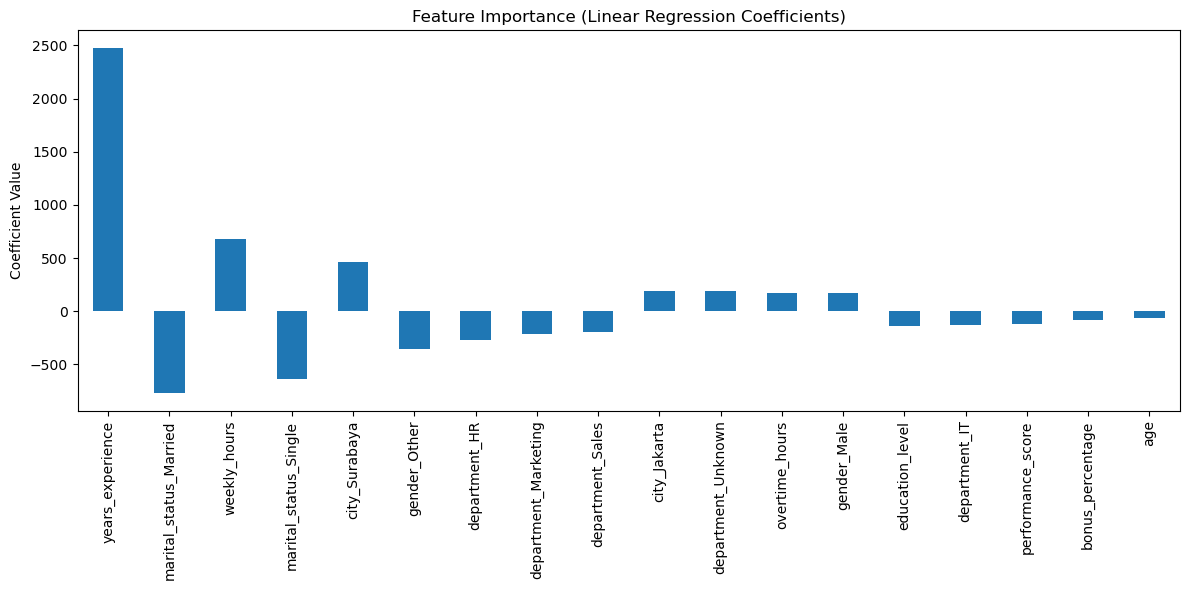

In [136]:
feature_importance.plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.savefig(f'Feature Importance (Linear Regression Coefficients)')
plt.show()

**INSIGHT**
- `years_experience` is the strongest positive factor. More experience &rarr; higher income.
- `weekly_hours` and `overtime_hours` increase income slightly.
- city, gender, and marital_status have non-negligible impacts.

## 12. Conclusion

---

### 12.1 Model Performance
#### Linear Regression Vs. Tuned Random Forest
- **Linear Regression** outperformed the tuned Random Forest on the test set:
  - RMSE: $3779$ vs $4078$ &rarr; Linear Regression makes more accurate predictions.
  - MAE: $1144$ vs 1384 &rarr; smaller median errors for Linear Regression.
  - $R^{2}$ : 0.32 vs 0.21 &rarr; Linear Regression explains more of the variation in monthly income.
--- 
### Feature Drivers of Monthly Income
- `years_experience` &rarr; more experience strongly increases predicted income.
- `weekly_hours`, `overtime_hours`, `city`: Surabaya, `gender`: Male, contribute to slightly positive increase in `monthly_income`
---
### CONLUSION
Income is mostly driven by experience and workload, with moderate influence from location, department, and demographic factors.

# Pickle

In [141]:
import pickle
# Save the entire pipeline (includes preprocessing + regression)
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save only preprocessor separately (optional, if you want)
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

# Streamlit

In [139]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import joblib
# import numpy as np
# import io
# import warnings

# # -------------------------------
# # 0. Suppress runtime warnings
# # -------------------------------
# warnings.filterwarnings("ignore", category=RuntimeWarning)

# st.title("Linear Regression Feature Importance Explorer")

# # -------------------------------
# # 1. File upload
# # -------------------------------
# st.subheader("Upload your files (optional)")
# uploaded_pipeline = st.file_uploader("Upload pipeline.joblib", type=["joblib"])
# uploaded_preprocessor = st.file_uploader("Upload preprocessor.joblib", type=["joblib"])
# uploaded_X_train = st.file_uploader("Upload X_train.csv", type=["csv"])

# use_placeholder = False

# if uploaded_pipeline and uploaded_preprocessor and uploaded_X_train:
#     pipeline = joblib.load(uploaded_pipeline)
#     preprocessor = joblib.load(uploaded_preprocessor)
#     X_train = pd.read_csv(uploaded_X_train)
# else:
#     st.warning("Files not uploaded. Using placeholder data.")
#     use_placeholder = True

# # -------------------------------
# # 2. Feature names and coefficients
# # -------------------------------
# if use_placeholder:
#     # Placeholder feature names and coefficients
#     feature_names = [
#         "years_experience", "marital_status_Married", "weekly_hours", "marital_status_Single",
#         "city_Surabaya", "gender_Other", "department_HR", "department_Marketing", "department_Sales",
#         "city_Jakarta", "department_Unknown", "overtime_hours", "gender_Male", "department_IT",
#         "education_level", "performance_score", "bonus_percentage", "age"
#     ]
#     coefficients = [2500, -750, 650, -600, 450, -400, -350, -300, -250, 200, 180, 160, 140, -120, -100, -80, -60, -40]
#     # Create random data for VIF computation
#     X_train = pd.DataFrame(
#         np.random.rand(10, len(feature_names)),  # 10 rows, random values
#         columns=feature_names
#     )
# else:
#     # Extract feature names from preprocessor
#     def get_feature_names(preprocessor):
#         output_features = []
#         for name, transformer, features in preprocessor.transformers_:
#             if name != 'remainder':
#                 if hasattr(transformer, 'get_feature_names_out'):
#                     output_features.extend(transformer.get_feature_names_out(features))
#                 else:
#                     output_features.extend(features)
#             else:
#                 output_features.extend(features)
#         return output_features

#     feature_names = get_feature_names(preprocessor)
#     coefficients = pipeline.named_steps['model'].coef_

# # -------------------------------
# # 3. Feature importance plot
# # -------------------------------
# feature_importance = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)

# fig, ax = plt.subplots(figsize=(12, 6))
# feature_importance.plot(kind='barh', ax=ax)
# ax.invert_yaxis()
# plt.title('Feature Importance (Linear Regression Coefficients)')
# plt.xlabel('Coefficient Value')
# plt.tight_layout()
# st.pyplot(fig)

# # -------------------------------
# # 4. Compute VIF
# # -------------------------------
# try:
#     if use_placeholder:
#         X_train_prep = X_train.values
#     else:
#         X_train_prep = preprocessor.transform(X_train)

#     vif_data = pd.DataFrame()
#     vif_data["Feature"] = feature_names
#     vif_data["VIF"] = [variance_inflation_factor(X_train_prep, i) for i in range(len(feature_names))]

#     st.subheader("Variance Inflation Factors (VIF)")
#     st.dataframe(vif_data.sort_values("VIF", ascending=False))
# except Exception as e:
#     st.warning(f"Could not calculate VIFs: {e}")

# # -------------------------------
# # 5. Info
# # -------------------------------
# st.markdown("""
# This app automatically extracts feature importance from your trained Linear Regression model  
# and computes VIFs to check for multicollinearity.  

# - **Upload your files** to see actual results.  
# - If files are missing, **placeholder data** is used for demonstration.  
# - The app avoids runtime warnings when using placeholders.
# """)


DeltaGenerator()